In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import data_prep
import data_exploration

In [3]:
font = {'family' : 'serif',
        'size'   : 15}

plt.rc('font', **font)
plt.rc('lines', linewidth=3)
plt.rc('axes', linewidth=3)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)

In [6]:
machine_name = 'Theta'

# Load Data (after Feature Engineering)

In [9]:
# Load the data to make sure we're using the same file as the other notebooks will use
df = data_prep.load_parse_engineered_df(machine_name)
df.head()

,JOB_NAME,COBALT_JOBID,MACHINE_NAME,QUEUED_TIMESTAMP,QUEUED_DATE_ID,START_TIMESTAMP,START_DATE_ID,END_TIMESTAMP,END_DATE_ID,USERNAME_GENID,...,SAME_QUEUE_JOBS_RUNNING,IS_WEEKEND,IS_NIGHT,NODES_x_RUNNING,TIME_SINCE_LAST_IN_QUEUE,QUEUE_AVG_WAIT,WAIT_TIME_LAST_FINISHED_IN_QUEUE,RUNTIME_HOURS_MASKED,QUEUE_AVG_RUNTIME,RUNTIME_LAST_FINISHED_IN_QUEUE
13,106679.theta,106679,theta,2017-06-30 18:42:02,20170630,2017-06-30 18:42:24,20170630,2017-07-01 00:43:45,20170701,60099593019159,...,0,False,False,0.0,NaN,0.910811,NaN,6.022500,0.439569,NaN
7,106686.theta,106686,theta,2017-06-30 19:00:14,20170630,2017-06-30 19:00:55,20170630,2017-07-01 00:20:31,20170701,82859864357327,...,1,False,False,8.0,1092.0,0.006111,0.006111,5.326667,6.022500,6.022500
6,106722.theta,106722,theta,2017-06-30 20:18:56,20170630,2017-06-30 20:19:20,20170630,2017-07-01 00:20:31,20170701,39882124280502,...,0,False,False,2.0,NaN,0.126266,NaN,4.019722,0.334725,NaN
8,106724.theta,106724,theta,2017-06-30 20:19:54,20170630,2017-06-30 20:20:16,20170630,2017-07-01 00:21:24,20170701,39882124280502,...,1,False,False,3.0,58.0,0.006667,0.006667,4.018889,4.019722,4.019722
44,106731.theta,106731,theta,2017-06-30 20:26:20,20170630,2017-06-30 20:26:39,20170630,2017-07-01 17:56:00,20170701,17031593209612,...,2,False,False,256.0,5166.0,0.008750,0.011389,21.489167,5.674583,5.326667


# Data Filtering for Plotting 

# Overall system utilization trend and Job Characteristics

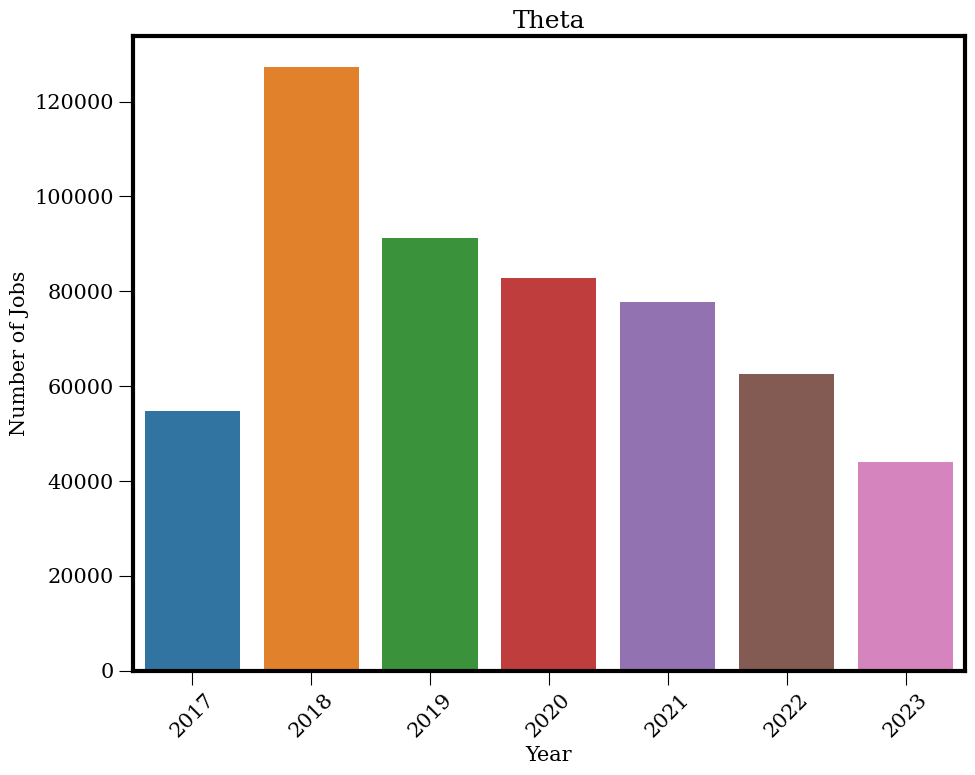

In [15]:
data_exploration.plot_jobs_per_year(df, machine_name)

In [17]:
data_exploration.stats_per_year(df)

   YEAR       mean    median        std       p25       p75
0  2017   2.054657  0.010833  12.368343  0.005000  0.352222
1  2018   2.632475  0.025833  15.804227  0.010833  0.554236
2  2019   5.767400  0.018056  26.634013  0.010278  1.381806
3  2020  14.971455  0.016944  62.657455  0.006111  1.105833
4  2021   8.037162  0.011667  36.347345  0.005278  1.726111
5  2022   6.650519  0.011389  24.293610  0.005278  2.386458
6  2023   4.721683  0.005833  21.962285  0.000000  1.256667


In [19]:
data_exploration.overall_stats(df)

Total jobs:540503
Users:1827
Projects:628


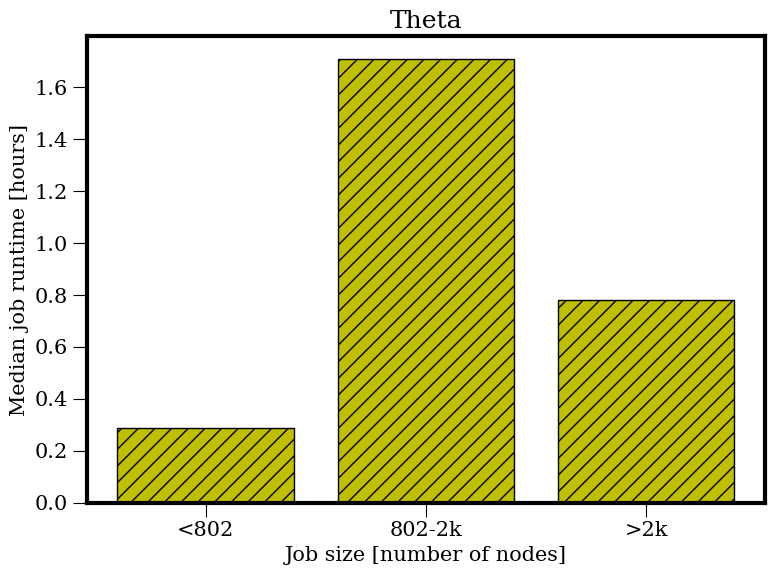

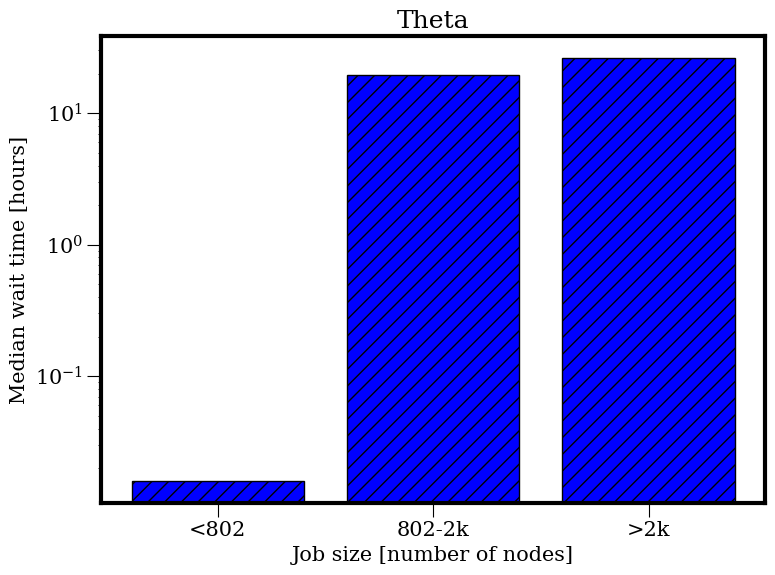

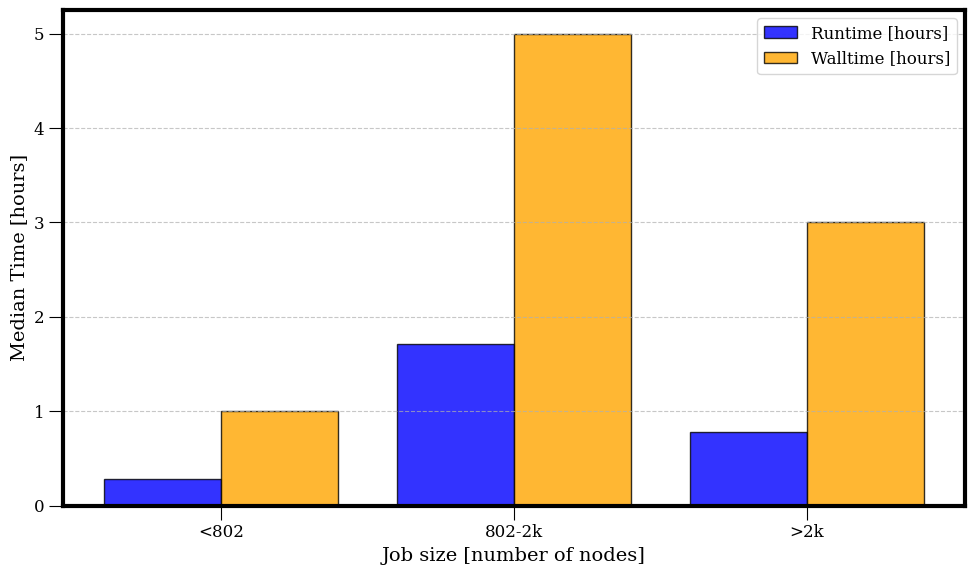

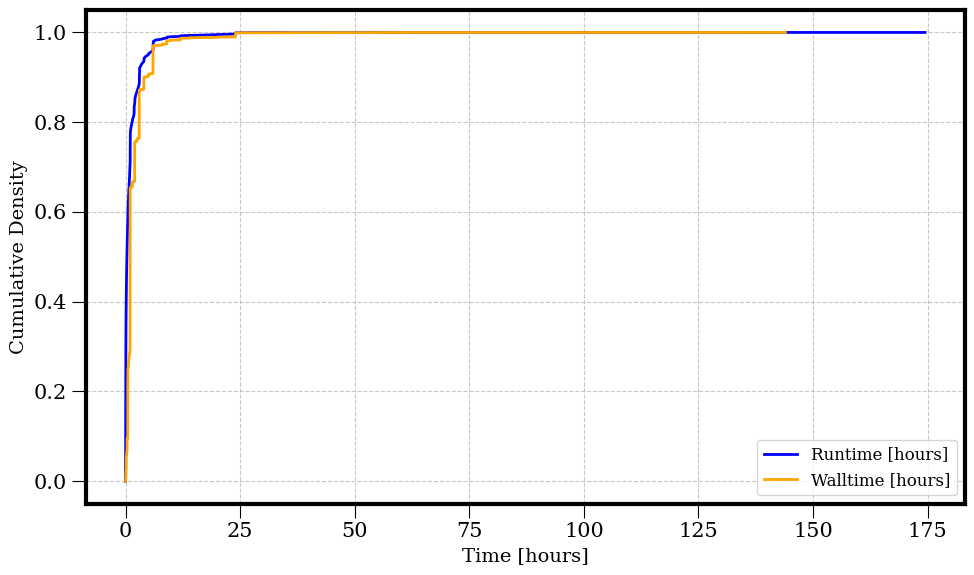

In [21]:
# including cummulative density plot of runtime and wall time
thresholds = [802, 2000]
keys = ['<802', '802-2k', '>2k']
data_exploration.plot_by_job_size(df, thresholds, keys, machine_name, 
                                  facecolor_runtime="y", edgecolor_runtime="black", hatch=r'//',
                                  facecolor_waittime="blue", edgecolor_waittime="black")

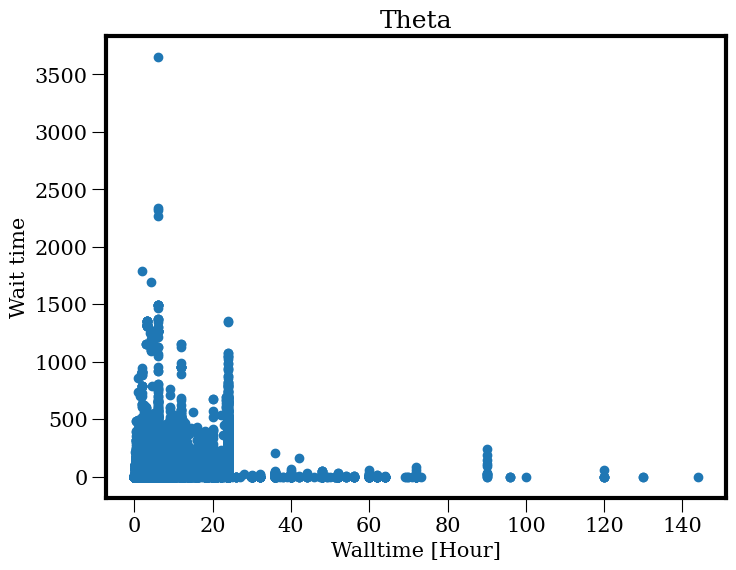

In [22]:
data_exploration.walltime_vs_waittime(df, machine_name)

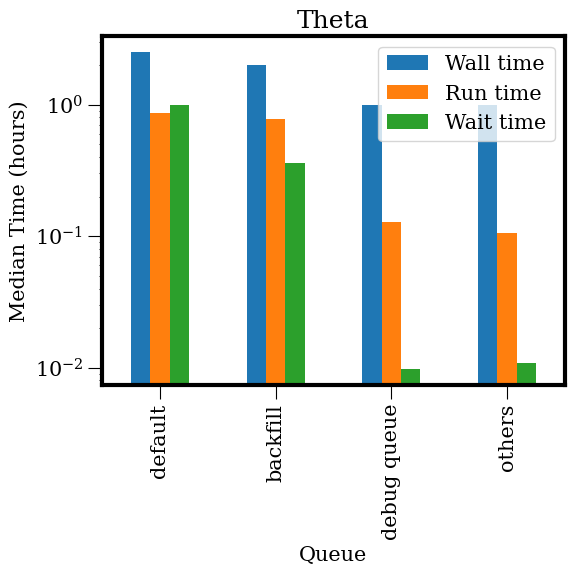

In [24]:
list_queues = ['default', 'backfill', ['debug-cache-quad', 'debug-flat-quad']]
list_names = ['default', 'backfill', 'debug queue', 'others']
data_exploration.get_queue_time(df, machine_name, list_queues, list_names)

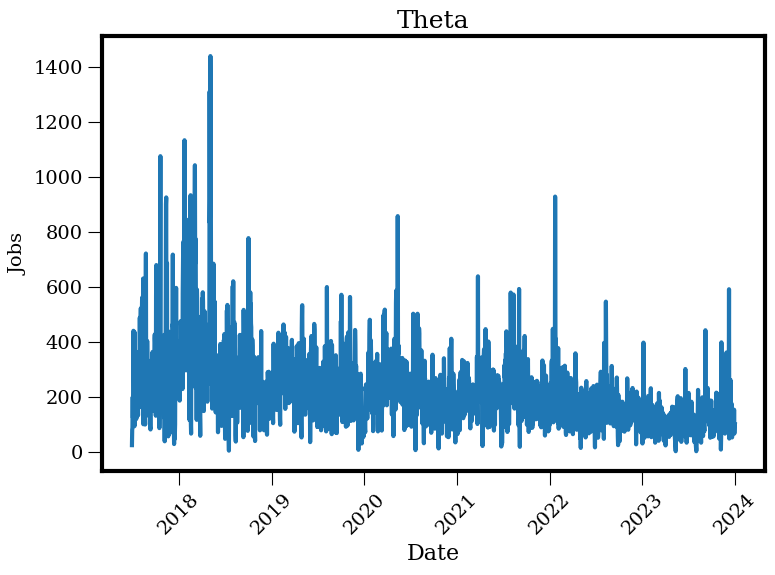

In [27]:
data_exploration.plot_events_per_day(df, machine_name)

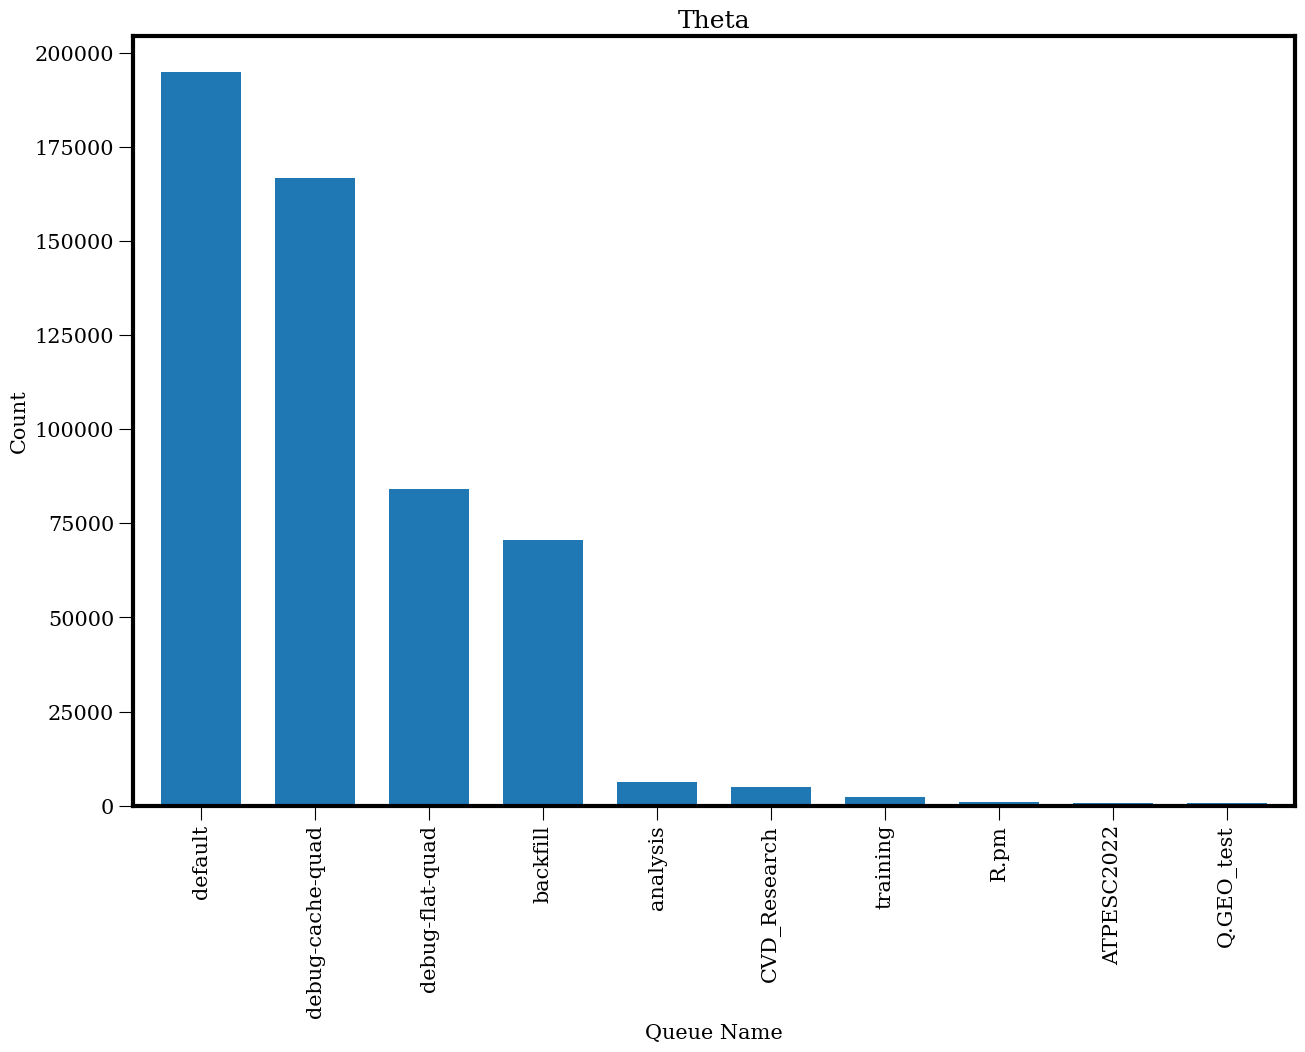

In [29]:
data_exploration.jobs_per_queue(df, machine_name)

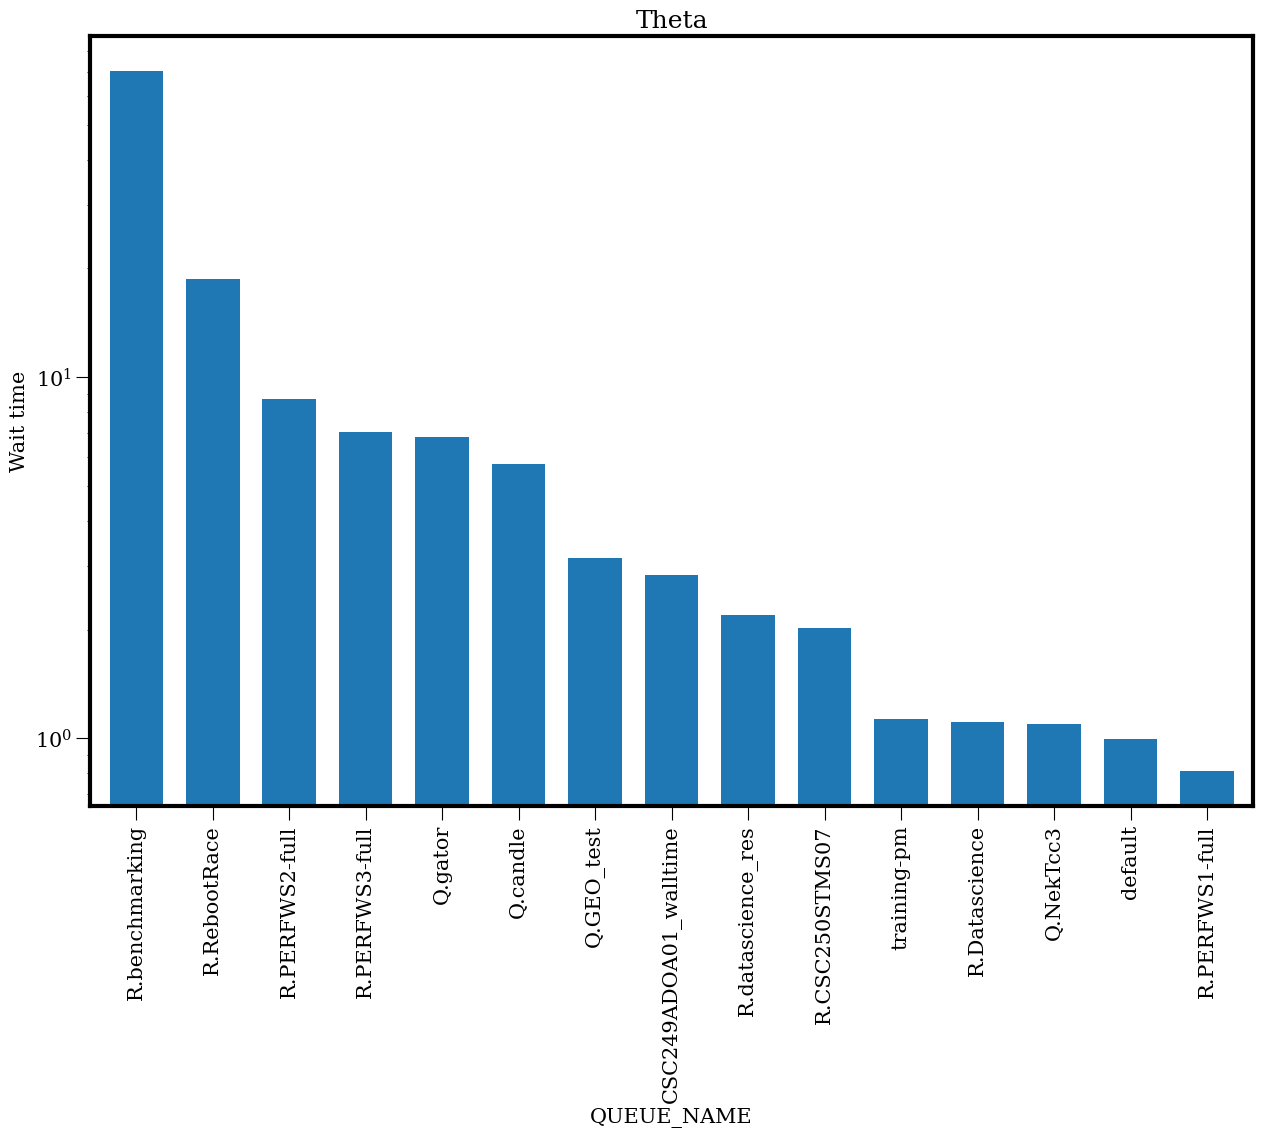

In [31]:
data_exploration.waittime_per_queue(df, machine_name)

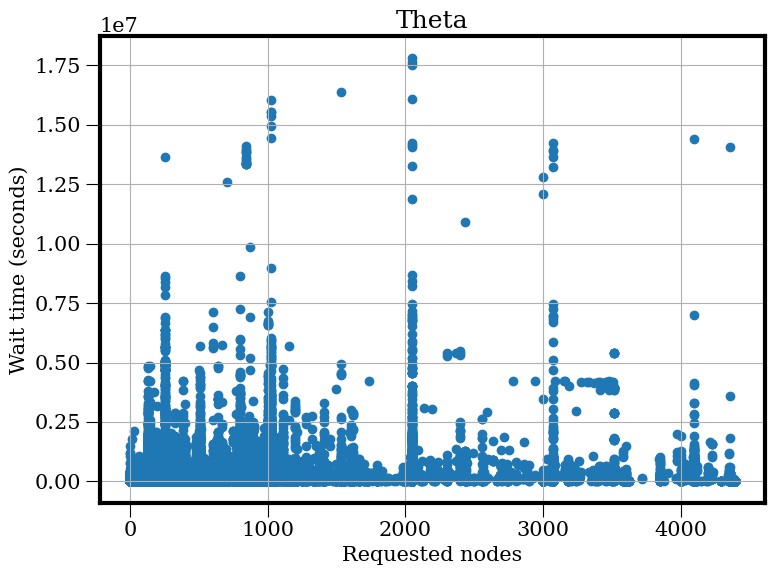

In [33]:
data_exploration.nodes_vs_waittime(df, machine_name)

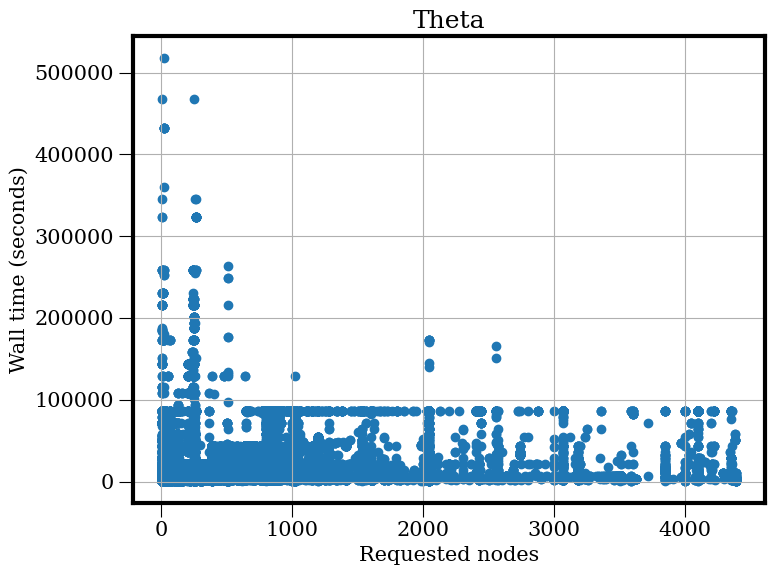

In [35]:
data_exploration.nodes_vs_walltime(df, machine_name)